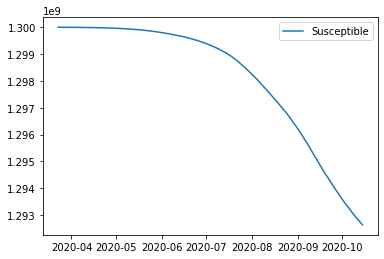

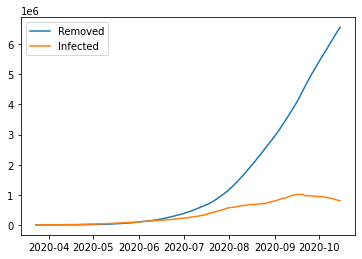

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

N=130*10**7 #population 
Confirmed=np.empty((207))
Recovered=np.empty((207))
Deceased=np.empty((207))

dt=pd.date_range(start='23/03/2020',end='15/10/2020',freq='D')
S=np.empty((207))
I=np.empty((207))
R=np.empty((207))
data = pd.read_csv('https://data.covid19india.org/csv/latest/state_wise_daily.csv')
date = data.loc[:,'Date']
TT = data.loc[:,'TT']
j=0
i=27

#Separating Confirmed, Recovered and Deceased cases
while i<=645:
  if j==0:
    Confirmed[j] = TT[i]
    Recovered[j] = TT[i+1]
    Deceased[j] = TT[i+2]
  else:
    Confirmed[j] = TT[i]
    Recovered[j] = TT[i+1]
    Deceased[j] = TT[i+2]
  i=i+3
  j=j+1

#Forming the R(t), I(t) and S(t) data
R = np.cumsum(Recovered)+np.cumsum(Deceased)
I = np.cumsum(Confirmed)-R
S=N-I-R

#plotting S, I, R vs t
plt.plot(dt,S,label='Susceptible')
plt.legend()
plt.show()
plt.plot(dt,R,label='Removed')
plt.plot(dt,I,label='Infected')
plt.legend()
plt.show()

dR=np.gradient(R) #dR/dt
dS=np.gradient(S) #dS/dt
dI=np.gradient(I) #dI/dt

#for Ax=b
b=np.row_stack((np.transpose([dS]),np.transpose([dI]),np.transpose([dR])))
x=np.transpose([[1.0,1.0]])

r1=np.transpose([(-1)*np.divide(I*S,N),np.zeros((207))])
r2=np.transpose([np.divide(I*S,N),(-1)*I])
r3=np.transpose([np.zeros((207)),I])
A=np.row_stack((r1,r2,r3))


Q1 (2): [dS/dt dI/dt dR/dt]  = [[-IS/N, 0],[IS/N, -I],[0, I]] [β,γ]  

In [189]:
#Jacobian_matrix
#For the type of eqn, f(x)=Ax-b: Jacobian, J = df/dx = A
J=A
KJ=np.linalg.cond(J) #Condition number of Jacobian
rank=np.linalg.matrix_rank(J) #rank of Jacobian
print("Rank of Jacobian:",rank)
print("Condition Number of Jacobian:",KJ)

#coefficient matrix = A
K=np.linalg.cond(A) #condition number of A
print("Condition Number of Coeff Matrix:",K)

if KJ==K:
  print("Rank of Jacobian and Coefficient matrix are same!")

Rank of Jacobian: 2
Condition Number of Jacobian: 1.732070716722878
Condition Number of Coeff Matrix: 1.732070716722878
Rank of Jacobian and Coefficient matrix are same!


In [190]:
#Cholesky_Factorization_code
B=tf.matmul(tf.transpose(A),A) #B = ATA
n=(np.shape(B)[0])
L=np.zeros((2,2))
for i in range(0,n):
  j=0
  while(j<=i):
    sum=0.0
    k=0
    while(k<j):
      sum+=L[i,k]*L[j,k]
      k+=1
    if i==j:
      L[i,j]=np.sqrt(B[i,i]-sum)
    else:
      L[i,j]=(1.0/L[j,j])*(B[i,j]-sum)
    j+=1

x=np.matmul(np.linalg.inv(np.matmul(L,np.transpose(L))),np.matmul(np.transpose(A),b)) #solving A^t.Ax = A^t.b
print("beta = ",x[0,0])
print("gamma = ",x[1,0])
print("R0 = ",x[0,0]/x[1,0])

beta =  0.09167505183592116
gamma =  0.08581237141119387
R0 =  1.0683197577262447


In [191]:
#using built in functions
b=b.reshape((np.shape(b)[0],)) #reshaping b to (621,) as it has to conform to the input parameters of lsq_linear
res=scipy.optimize.lsq_linear(A,b)
print("beta = ",x[0,0])
print("gamma = ",x[1,0])
print("R0 = ",x[0,0]/x[1,0])

beta =  0.09167505183592116
gamma =  0.08581237141119387
R0 =  1.0683197577262447


Both the solutions by Cholesky factorization and Linear Least squares give the same result

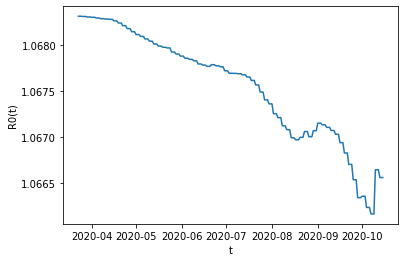

In [192]:
#to plot R0(t)

n=207 #no of data points
R0t=np.empty((n,1))

for t in range(0,207):
  i=0
  j=0
  while i<=t:
    if j==0:
      Confirmed[j] = TT[i]
      Recovered[j] = TT[i+1]
      Deceased[j] = TT[i+2]
    else:
      Confirmed[j] = TT[i]
      Recovered[j] = TT[i+1]
      Deceased[j] = TT[i+2]
    i=i+3
    j=j+1
  
  R = np.cumsum(Recovered)+np.cumsum(Deceased)
  I = np.cumsum(Confirmed)-R
  S=N-I-R

  dR=np.gradient(R)
  dS=np.gradient(S)
  dI=np.gradient(I)
  
  b=np.row_stack((np.transpose([dS]),np.transpose([dI]),np.transpose([dR])))
  x=np.transpose([[1.0,1.0]])
  
  r1=np.transpose([(-1)*np.divide(I*S,N),np.zeros((207))])
  r2=np.transpose([np.divide(I*S,N),(-1)*I])
  r3=np.transpose([np.zeros((207)),I])
  A=np.row_stack((r1,r2,r3))
  
  b=b.reshape((np.shape(b)[0],)) #reshaping b to (621,) as it has to conform to the input parameters of lsq_linear
  res=scipy.optimize.lsq_linear(A,b)
  x=res.x
  beta=x[0]
  gamma=x[1]
  R0t[t]=beta/gamma

plt.plot(dt,R0t)
plt.xlabel('t')
plt.ylabel('R0(t)')
plt.show()

Since R0 = 1.07 > 1, the peak has not passed as of Oct 2020